In [13]:
head(mtcars)
input = mtcars[, c("mpg", "disp", "hp", "wt")]
head(input)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


,mpg,disp,hp,wt
,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,160,110,2.620
Mazda RX4 Wag,21.0,160,110,2.875
Datsun 710,22.8,108,93,2.320
Hornet 4 Drive,21.4,258,110,3.215
Hornet Sportabout,18.7,360,175,3.440
Valiant,18.1,225,105,3.460


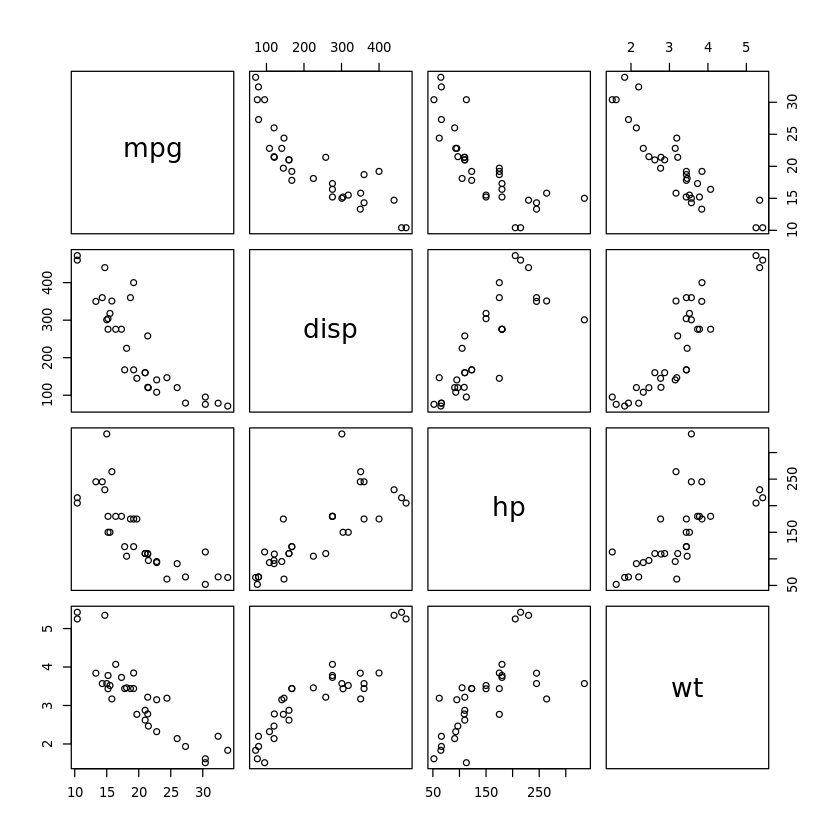

In [14]:
pairs(~mpg+disp+hp+wt, data=input)

In [15]:
library("ggplot2")

In [16]:
par(mfrow=c(1,4))

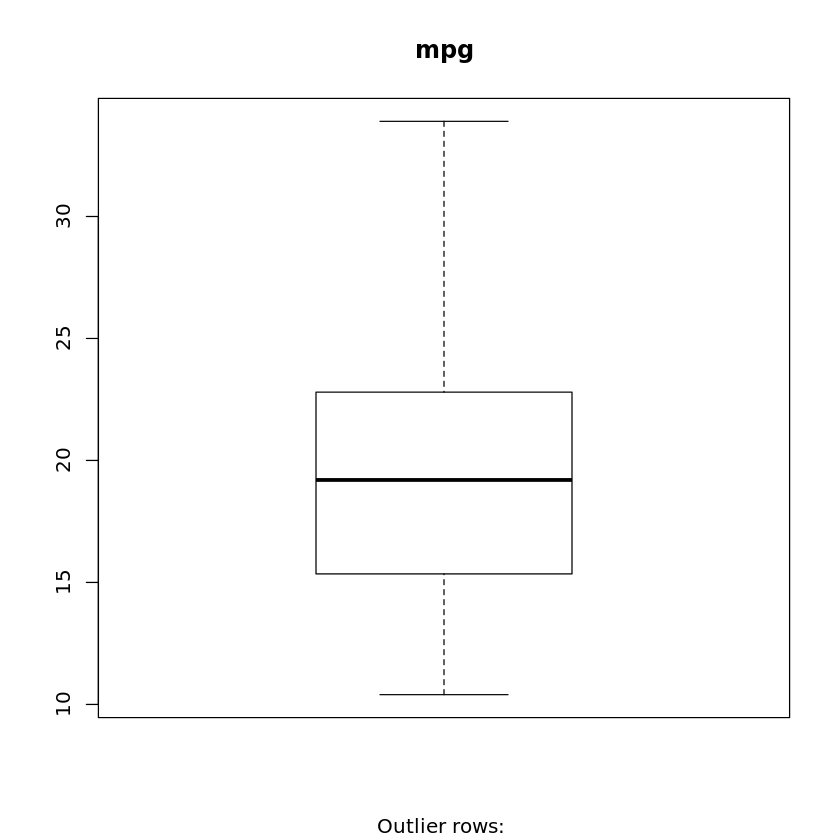

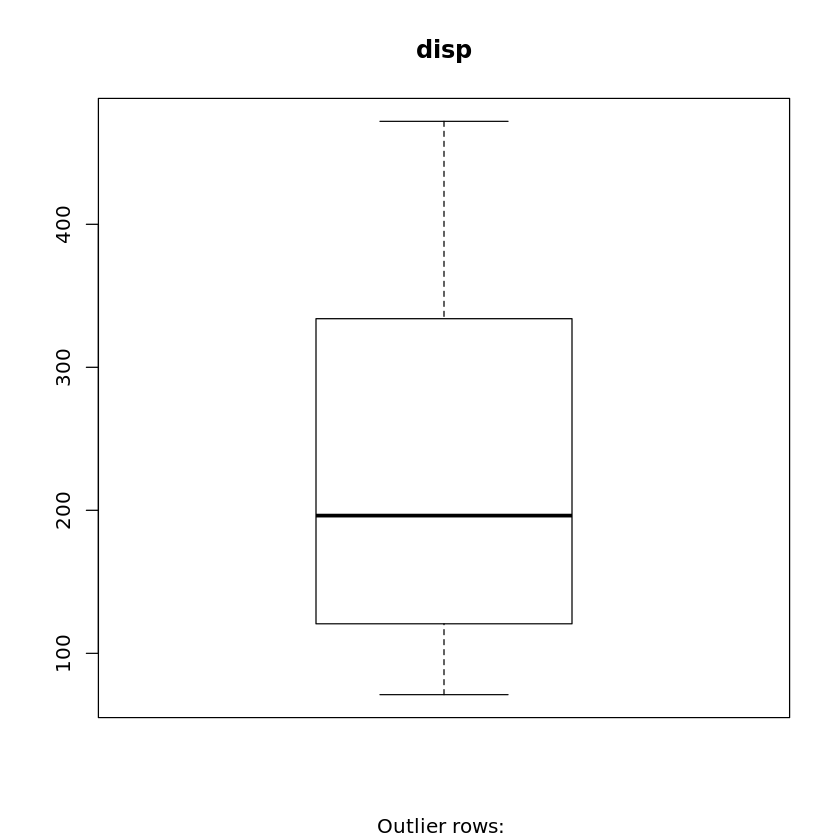

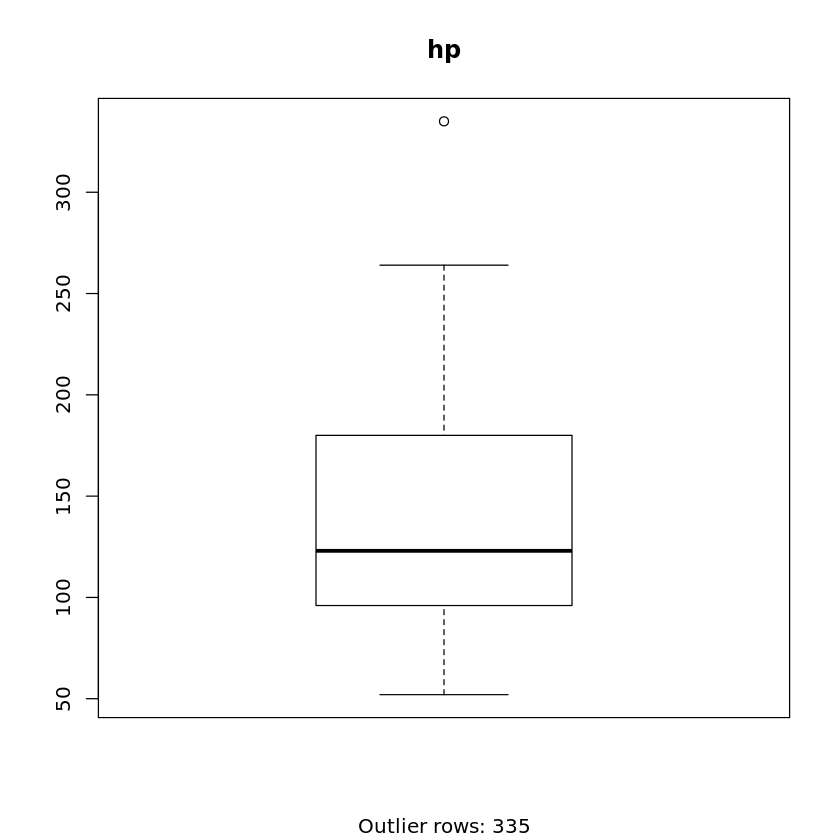

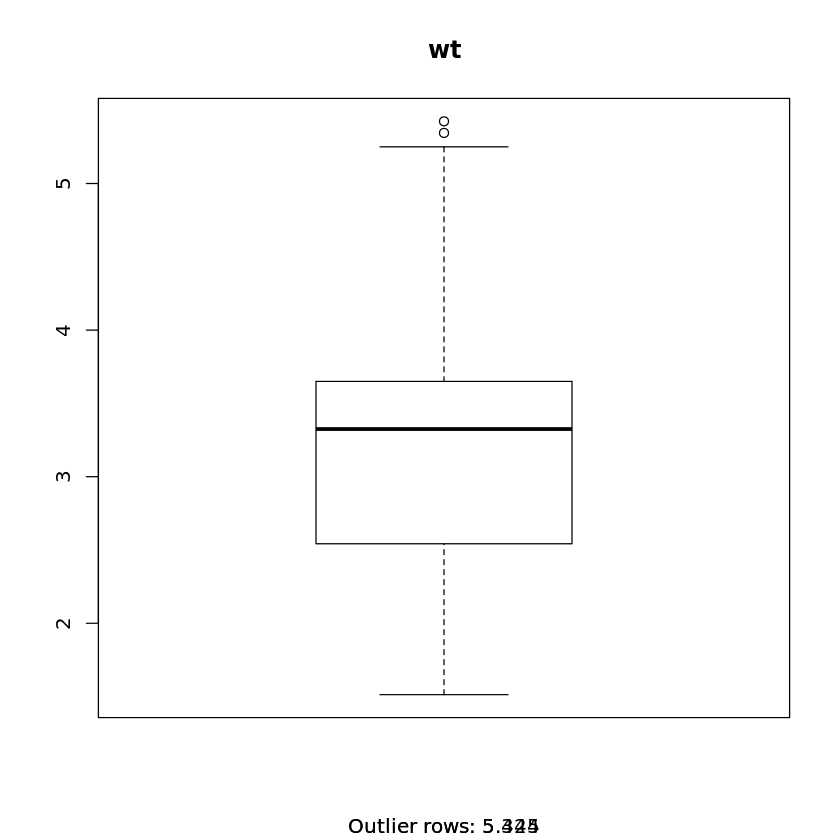

In [17]:
boxplot(input$mpg, main = "mpg",
       sub=paste("Outlier rows:", boxplot.stats(input$mpg)$out))
boxplot(input$disp, main = "disp",
       sub=paste("Outlier rows:", boxplot.stats(input$disp)$out))
boxplot(input$hp, main = "hp",
       sub=paste("Outlier rows:", boxplot.stats(input$hp)$out))
boxplot(input$wt, main = "wt",
       sub=paste("Outlier rows:", boxplot.stats(input$wt)$out))


In [18]:
boxplot.stats(input$hp)$out

[1] 335

In [19]:
boxplot.stats(input$wt)$out

[1] 5.424 5.345

In [20]:
hp_outliers = boxplot.stats(input$hp)$out

In [21]:
wt_outliers = boxplot.stats(input$wt)$out

In [23]:
print(paste("before drop:", nrow(input)))
input = input[input$hp != hp_outliers[1],]
input = input[input$wt != wt_outliers[1],]
input = input[input$wt != wt_outliers[2],]
#input = input[input$hp != hp_outliers & input$wt != wt_outliers,]
print(paste("after drop: ", nrow(input)))
# viet cach khac su dung tidyverse filter

[1] "before drop: 31"
[1] "after drop:  29"


In [ ]:
c(hp_outliers, wt_outliers)

In [24]:
print("correlation bt mpg and disp, hp, wt:")
print(cor(input$mpg, input$disp))
print(cor(input$mpg, input$hp))
print(cor(input$mpg, input$wt))

[1] "correlation bt mpg and disp, hp, wt:"
[1] -0.8290389
[1] -0.7997213
[1] -0.8830596


In [25]:
set.seed(42)
trainingRowIndex = sample(1:nrow(input), 0.7*nrow(input))
print("selected traning row indexs:")
print(trainingRowIndex)

[1] "selected traning row indexs:"
 [1] 27 29  8 22 17 13 25  3 14 15  9 24 16  5  7 21 18  2  6 11


In [26]:
trainingData = input[trainingRowIndex, ]
testData = input[-trainingRowIndex, ]
print("Rows of training data and test data:")
print(nrow(trainingData))
print(nrow(testData))

[1] "Rows of training data and test data:"
[1] 20
[1] 9


In [27]:
lmMod = lm(mpg ~ disp+hp+wt, data=trainingData)
iPred = predict(lmMod, testData)
mse = mean(lmMod$residuals^2)
print(paste("mse: ", mse))
mse_test = mean((testData$mpg - iPred) ^2)
print(paste("mse in test: ", mse_test))

[1] "mse:  4.66173552306676"
[1] "mse in test:  5.09721067024203"


In [28]:
y_mean_train = mean(trainingData$mpg)
y_mean_train

[1] 20.925

In [29]:
rss <- sum((trainingData$mpg - iPred) ^ 2)
tss <- sum((trainingData$mpg - y_mean_train) ^ 2)
R2_train = 1- rss/tss
R2_train                                                          

Warning message in trainingData$mpg - iPred:
“longer object length is not a multiple of shorter object length”

[1] -0.2173667

In [30]:
y_mean_test = mean(testData$mpg)
rss <- sum((testData$mpg - iPred) ^ 2)
tss <- sum((testData$mpg - y_mean_test) ^ 2)
R2_test = 1- rss/tss
R2_test   

[1] 0.6855634

In [31]:
print(summary(lmMod))


Call:
lm(formula = mpg ~ disp + hp + wt, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7144 -1.4805 -0.1415  1.0677  4.9048 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.104833   2.861317  14.366 1.46e-10 ***
disp         0.006874   0.015796   0.435  0.66924    
hp          -0.046560   0.020043  -2.323  0.03369 *  
wt          -5.035287   1.372928  -3.668  0.00208 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.414 on 16 degrees of freedom
Multiple R-squared:  0.8857,	Adjusted R-squared:  0.8643 
F-statistic: 41.34 on 3 and 16 DF,  p-value: 9.192e-08



In [32]:
print(coef(lmMod))

 (Intercept)         disp           hp           wt 
41.104832662  0.006873996 -0.046559717 -5.035287058 


In [33]:
b = coef(lmMod)[1]
print(paste("Intercept: ", b))
mdisp = coef(lmMod)[2]
mhp = coef(lmMod)[2]
mwt = coef(lmMod)[3]

[1] "Intercept:  41.1048326622958"


In [34]:
x1 = 221
x2 = 102
x3= 2.91
y = (mdisp*x1 + mhp*x2 +mwt*x3 +b)
print(y)

    disp 
43.18964 


In [35]:
y1 = predict(lmMod, data.frame(disp = x1, hp =x2, wt=x3))
print(y1)

       1 
23.22221 
